#Mobile Price Dataset
## Võ Thành Hoàng Sơn - 19DH110660



#LAB1(Continue) - Dataset(Mobile Price Dataset)
#Thực hiện lại các bước xử lý đã nêu ở Lab1
-  Source: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification
- Name: Mobile Price Classification
- Context:
  - Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.
  - He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

  - Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

- Problem: In this problem you do not have to predict actual price but a price range indicating how high the price is



## Load dataset
- Dataset ulr: 1AvhQXsYbaLg9ZLGWhZir1C9lYQJgZg_D
- Folder tree:
  - Mobile Price Dataset
    + test.csv
    + train.csv
    

In [ ]:
url = 'https://drive.google.com/drive/folders/1AvhQXsYbaLg9ZLGWhZir1C9lYQJgZg_D?usp=sharing'
import gdown
gdown.download_folder(url)

Retrieving folder list


Processing file 1_fWtViL-QZf5zsQx4MW44VUiaHmjOMOl test.csv
Processing file 1ASxEE4V7gnixpe6RMTVSXBZMni1L--Vu train.csv
Building directory structure completed


Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=1_fWtViL-QZf5zsQx4MW44VUiaHmjOMOl
To: /content/mobile_price_dataset/test.csv
100%|██████████| 63.9k/63.9k [00:00<00:00, 35.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ASxEE4V7gnixpe6RMTVSXBZMni1L--Vu
To: /content/mobile_price_dataset/train.csv
100%|██████████| 122k/122k [00:00<00:00, 26.5MB/s]
Download completed


['/content/mobile_price_dataset/test.csv',
 '/content/mobile_price_dataset/train.csv']

## Import library


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics


In [ ]:
train = pd.read_csv('mobile_price_dataset/train.csv')
test = pd.read_csv('mobile_price_dataset/test.csv')

In [ ]:
categorical = ['blue', 'dual_sim', 'four_g', 'three_g','touch_screen', 'wifi']
numerical = [ 'battery_power', 'clock_speed','pc' ,'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 
             'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

def convert_type(df,columns,astype):
    for feature in columns:
        df[feature] = df[feature].astype(astype)
        
convert_type(train,categorical,'category')
convert_type(test,categorical[:-1],'category')

In [ ]:
convert_type(train,['price_range'],'category')

# LAB2 - GridSearch with Dim Reduce & MLP, Decision Tree

## Thực nghiệm với Grid Search với phương pháp Giảm chiều dữ liệu

- Ở đây chúng ta sẽ thực hiện 3 thực nghiệm như sau:
  

1.   Thực nghiệm với tất cả trường hợp (bao gồm PCA, LDA, Kết hợp PCA và LDA, Không sử dụng giảm chiều)
2.   Thực nghiệm với tất cả trường hợp sử dụng phương pháp giảm chiều dữ liệu (bao gồm PCA, LDA, Kết hợp PCA và LDA)
1.   Thêm giá trị vào dãy n_component để xem giá trị n_component tối ưu.

- Sau đó ghi nhận tất cả kết quả và nhận xét








### Có cả phương pháp không giảm chiều dữ liệu

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer,StandardScaler,MaxAbsScaler,FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import sklearn

## Dim reduction
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Custom transform
from sklearn.preprocessing import FunctionTransformer

## Pipeline 
!pip install pipelinehelper -q
from sklearn.pipeline import Pipeline
from pipelinehelper import PipelineHelper

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import os
n_cpus= os.cpu_count()
print(n_cpus)

## Pipeline params

params = {}
params["data_split_train"] = 0.7
params['random_state'] = 54
params['k_fold'] = 3

40


In [ ]:
pipe = Pipeline([
    ('redudim', PipelineHelper([
        ('pca', PCA()),
        ('pcanlda', Pipeline([
            ('pcaa', PCA()),
            ('ldaa', LinearDiscriminantAnalysis())
        ])),
        ('lda', LinearDiscriminantAnalysis()),
        ('non', FunctionTransformer(None,validate=False)),
    ])),

    ('scaler', PipelineHelper([
        ('std', StandardScaler()),
        ('normal', Normalizer()),
        ('non', FunctionTransformer(None,validate=False)),
    ])),
    ('classifier', PipelineHelper([
        # ('svm', SVC()),
        ('lr', LogisticRegression()),
        # ('knn', KNeighborsClassifier())
        ('mlp', MLPClassifier()),
        ('dtree', DecisionTreeClassifier())

    ])),
])

# Các cấu hình thử nghiệm
parameters = {
    'redudim__selected_model': pipe.named_steps['redudim'].generate({
        'pca__n_components':[.95,.97,.99],
        'pca__whiten': [True,False],
        'pca__svd_solver':['full', 'arpack', 'randomized'],

        'pcanlda__pcaa__n_components':[.95,.97,.99],
        'pcanlda__pcaa__whiten': [True,False],
        'pcanlda__pcaa__svd_solver':['full', 'arpack', 'randomized'],


        'pcanlda__ldaa__solver':['svd', 'lsqr', 'eigen'],
        'pcanlda__ldaa__n_components':[.95,.97,.99],

        'lda__solver':['svd', 'lsqr', 'eigen'],
        'lda__n_components':[.92,.95,.99]
    }),



    'scaler__selected_model': pipe.named_steps['scaler'].generate({
        'std__with_mean': [True],
        'std__with_std': [False],

        'normal__norm': ['l1','l2','max']
    }),
    'classifier__selected_model': pipe.named_steps['classifier'].generate({
        # 'svm__C': [1.0, 10.0],
        # 'svm__kernel': ['poly','rbf','sigmoid'],
        # 'svm__degree': [2,5,10],


        'lr__fit_intercept': [True,False],
        'lr__solver': ['newton-cg','liblinear','saga'],
        'lr__max_iter': [100,500],

        # 'knn__n_neighbors' : [5,10,15,20,25,30],
        # 'knn__leaf_size': [20,25,30,35,40]

        'mlp__hidden_layer_sizes': [2,3,4],
        # 'mlp__lr': [4e-3,1e-4],

       
        
    })
}

In [ ]:
# Chia tập dữ liệu
X_train, X_test, y_train, y_test = train_test_split(train.iloc[:,0:-1],
                                                    train.iloc[:,-1],
                                                    random_state=params["random_state"],
                                                    train_size=params['data_split_train'])

# Lựa chọn cấu hình: kiểm thử chéo 
grid = GridSearchCV(pipe, parameters, cv=params['k_fold'], 
                    scoring='accuracy',refit=True,n_jobs=n_cpus,
                    verbose=10)
#Fit and train model
grid.fit(X_train, y_train)


print("-"*80)
print("Cấu hình tốt nhất: ", grid.best_params_)
print("Độ chính xác: {:6.2f}".format(grid.score(X_test, y_test)))

Fitting 3 folds for each of 15200 candidates, totalling 45600 fits
--------------------------------------------------------------------------------
Cấu hình tốt nhất:  {'classifier__selected_model': ('lr', {'fit_intercept': True, 'max_iter': 100, 'solver': 'newton-cg'}), 'redudim__selected_model': ('non', {}), 'scaler__selected_model': ('std', {'with_mean': True, 'with_std': False})}
Độ chính xác:   0.96


**Nhận xét**: Khi không sử dụng phương pháp giảm chiều dữ liệu sẽ cho ra kết quả tối ưu hơn

### Thực hiện thực nghiệm bắt buộc sử dụng phương pháp giảm chiều dữ liệu

In [ ]:
pipe = Pipeline([
    ('redudim', PipelineHelper([
        ('pca', PCA()),
        ('pcanlda', Pipeline([
            ('pcaa', PCA()),
            ('ldaa', LinearDiscriminantAnalysis())
        ])),
        ('lda', LinearDiscriminantAnalysis()),
        # ('non', FunctionTransformer(None,validate=False)),
    ])),

    ('scaler', PipelineHelper([
        ('std', StandardScaler()),
        ('normal', Normalizer()),
        ('non', FunctionTransformer(None,validate=False)),
    ])),
    ('classifier', PipelineHelper([
        # ('svm', SVC()),
        ('lr', LogisticRegression()),
        # ('knn', KNeighborsClassifier())
        ('mlp', MLPClassifier()),
        ('dtree', DecisionTreeClassifier())

    ])),
])

# Các cấu hình thử nghiệm
parameters = {
    'redudim__selected_model': pipe.named_steps['redudim'].generate({
        'pca__n_components':[.95,.97,.99],
        'pca__whiten': [True,False],
        'pca__svd_solver':['full', 'arpack', 'randomized'],

        'pcanlda__pcaa__n_components':[.95,.97,.99],
        'pcanlda__pcaa__whiten': [True,False],
        'pcanlda__pcaa__svd_solver':['full', 'arpack', 'randomized'],


        'pcanlda__ldaa__solver':['svd', 'lsqr', 'eigen'],
        'pcanlda__ldaa__n_components':[.95,.97,.99],

        'lda__solver':['svd', 'lsqr', 'eigen'],
        'lda__n_components':[.92,.95,.99]
    }),



    'scaler__selected_model': pipe.named_steps['scaler'].generate({
        'std__with_mean': [True],
        'std__with_std': [False],

        'normal__norm': ['l1','l2','max']
    }),
    'classifier__selected_model': pipe.named_steps['classifier'].generate({
        # 'svm__C': [1.0, 10.0],
        # 'svm__kernel': ['poly','rbf','sigmoid'],
        # 'svm__degree': [2,5,10],


        'lr__fit_intercept': [True,False],
        'lr__solver': ['newton-cg','liblinear','saga'],
        'lr__max_iter': [100,500],

        # 'knn__n_neighbors' : [5,10,15,20,25,30],
        # 'knn__leaf_size': [20,25,30,35,40]

        'mlp__hidden_layer_sizes': [2,3,4],
        # 'mlp__lr': [4e-3,1e-4],

    })
}
# Chia tập dữ liệu
X_train, X_test, y_train, y_test = train_test_split(train.iloc[:,0:-1],
                                                    train.iloc[:,-1],
                                                    random_state=params["random_state"],
                                                    train_size=params['data_split_train'])

# Lựa chọn cấu hình: kiểm thử chéo 
grid = GridSearchCV(pipe, parameters, cv=params['k_fold'], scoring='accuracy',
                    refit=True,n_jobs=n_cpus,
                    verbose=10)
#Fit and train model
grid.fit(X_train, y_train)


print("-"*80)
print("Cấu hình tốt nhất: ", grid.best_params_)
print("Độ chính xác: {:6.2f}".format(grid.score(X_test, y_test)))

Fitting 3 folds for each of 28080 candidates, totalling 84240 fits
--------------------------------------------------------------------------------
Cấu hình tốt nhất:  {'classifier__selected_model': ('lr', {'fit_intercept': True, 'max_iter': 100, 'solver': 'newton-cg'}), 'redudim__selected_model': ('pca', {'n_components': 0.95, 'svd_solver': 'full', 'whiten': False}), 'scaler__selected_model': ('std', {'with_mean': True, 'with_std': False})}
Độ chính xác:   0.94


**Nhận xét:** Khi sử dụng phương pháp giảm chiều dữ liệu thì phương pháp được xử dụng là PCA với n_component là giá trị thấp nhất trong danh sách chọn

**Phương pháp:** Thêm giá trị vào dãy n_component để xem kết quả.

### Thực nghiệm thêm giá trị cho thông số n_component

In [ ]:
pipe = Pipeline([
    ('redudim', PipelineHelper([
        ('pca', PCA()),
        ('pcanlda', Pipeline([
            ('pcaa', PCA()),
            ('ldaa', LinearDiscriminantAnalysis())
        ])),
        ('lda', LinearDiscriminantAnalysis()),
        ('non', FunctionTransformer(None,validate=False)),
    ])),

    ('scaler', PipelineHelper([
        ('std', StandardScaler()),
        ('normal', Normalizer()),
        ('non', FunctionTransformer(None,validate=False)),
    ])),
    ('classifier', PipelineHelper([
        # ('svm', SVC()),
        ('lr', LogisticRegression()),
        # ('knn', KNeighborsClassifier())
        ('mlp', MLPClassifier()),
        ('dtree', DecisionTreeClassifier())

    ])),
])

# Các cấu hình thử nghiệm
parameters = {
    'redudim__selected_model': pipe.named_steps['redudim'].generate({
        'pca__n_components':[.95,.97,.99],
        'pca__whiten': [True,False],
        'pca__svd_solver':['full', 'arpack', 'randomized'],

        'pcanlda__pcaa__n_components':[.8, .9, .92,.95,.97,.99],
        'pcanlda__pcaa__whiten': [True,False],
        'pcanlda__pcaa__svd_solver':['full', 'arpack', 'randomized'],


        'pcanlda__ldaa__solver':['svd', 'lsqr', 'eigen'],
        'pcanlda__ldaa__n_components':[.95,.97,.99],

        'lda__solver':['svd', 'lsqr', 'eigen'],
        'lda__n_components':[.92,.95,.99]
    }),



    'scaler__selected_model': pipe.named_steps['scaler'].generate({
        'std__with_mean': [True],
        'std__with_std': [False],

        'normal__norm': ['l1','l2','max']
    }),
    'classifier__selected_model': pipe.named_steps['classifier'].generate({
        # 'svm__C': [1.0, 10.0],
        # 'svm__kernel': ['poly','rbf','sigmoid'],
        # 'svm__degree': [2,5,10],


        'lr__fit_intercept': [True,False],
        'lr__solver': ['newton-cg','liblinear','saga'],
        'lr__max_iter': [100,500],

        # 'knn__n_neighbors' : [5,10,15,20,25,30],
        # 'knn__leaf_size': [20,25,30,35,40]

        'mlp__hidden_layer_sizes': [2,3,4],
        # 'mlp__lr': [4e-3,1e-4],

       
        
    })
}

In [ ]:
# Chia tập dữ liệu
X_train, X_test, y_train, y_test = train_test_split(train.iloc[:,0:-1],
                                                    train.iloc[:,-1],
                                                    random_state=params["random_state"],
                                                    train_size=params['data_split_train'])

# Lựa chọn cấu hình: kiểm thử chéo 
grid = GridSearchCV(pipe, parameters, cv=params['k_fold'], scoring='accuracy', refit=True,
                    n_jobs=n_cpus,
                    verbose=10)
#Fit and train model
grid.fit(X_train, y_train)


print("-"*80)
print("Cấu hình tốt nhất: ", grid.best_params_)
print("Độ chính xác: {:6.2f}".format(grid.score(X_test, y_test)))

Fitting 3 folds for each of 28160 candidates, totalling 84480 fits
--------------------------------------------------------------------------------
Cấu hình tốt nhất:  {'classifier__selected_model': ('lr', {'fit_intercept': True, 'max_iter': 100, 'solver': 'newton-cg'}), 'redudim__selected_model': ('non', {}), 'scaler__selected_model': ('std', {'with_mean': True, 'with_std': False})}
Độ chính xác:   0.96


### Các kết quả sau mỗi lần grid search

--------------------------------------------------------------------------------

***Thực nghiệm 1***

--------------------------------------------------------------------------------
**Cấu hình tốt nhất:**
{'classifier__selected_model': ('lr', {'fit_intercept': True, 'max_iter': 100, 'solver': 'newton-cg'}), 'redudim__selected_model': ('non', {}), 'scaler__selected_model': ('std', {'with_mean': True, 'with_std': False})} 

**Độ chính xác:   0.96**

--------------------------------------------------------------------------------

***Thực nghiệm 2***

--------------------------------------------------------------------------------
**Cấu hình tốt nhất:**
{'classifier__selected_model': ('lr', {'fit_intercept': True, 'max_iter': 100, 'solver': 'newton-cg'}), 'redudim__selected_model': ('pca', {'n_components': 0.95, 'svd_solver': 'full', 'whiten': False}), 'scaler__selected_model': ('std', {'with_mean': True, 'with_std': False})}


**Độ chính xác:   0.94**


**Nhận xét:**
Với bộ dataset Mobile Price không sử dụng các phương pháp Dim Redution sẽ cho ra kết quả tốt hơn

**Phương pháp:** 
Thí nghiệm: Khi sử dụng Dim Reduce cho ta kết quả tốt nhất tại n_component = 95 là nhỏ nhất trong bảng chọn. Vì thế tiến hành thêm các giá trị nhỏ hơn vào pipeline để kiểm thử


--------------------------------------------------------------------------------
***Thực nghiệm 3***

--------------------------------------------------------------------------------
**Cấu hình tốt nhất:** {'classifier__selected_model': ('lr', {'fit_intercept': True, 'max_iter': 100, 'solver': 'newton-cg'}), 'redudim__selected_model': ('pca', {'n_components': 0.95, 'svd_solver': 'full', 'whiten': False}), 'scaler__selected_model': ('std', {'with_mean': True, 'with_std': False})}

**Độ chính xác:   0.94**


--------------------------------------------------------------------------------

**Kết luận:**  Tập dữ liệu sẽ đạt kết quả tốt nhất nếu không sử dụng phương pháp giảm chiều dữ liệu. Tuy nhiên nếu phải sử dụng thì phương pháp PCA là phương pháp tốt nhất với cấu hình tại thực nghiệm 3.


# Chạy model với thông số tối ưu và có PCA ⚡



In [ ]:
pca = PCA(n_components=.95, svd_solver='full', whiten=False)
pca = pca.fit(train.iloc[:,0:-1])
pca_train = pca.transform(train.iloc[:,0:-1])
pca_train = pd.DataFrame(pca_train)

In [ ]:
pca_train.head()

,0,1,2,3
0,430.597094,-795.788231,-390.070331,55.636140
1,504.984735,696.622368,-235.629081,343.925977
2,473.329828,763.942136,-680.059466,-113.916880
3,639.822324,779.691180,-630.783647,-30.402246
4,-718.985184,382.304525,591.040362,-392.357235


**Nhận xét:** Sau khi sử dụng PCA với n_component = 0.9 ta thu được 4 cột

In [ ]:
print(pca_train.shape)

cov = np.cov(pca_train.T)
pd.DataFrame(cov).style.background_gradient(cmap='RdYlBu_r')

(2000, 4)


,0,1,2,3
0,1176743.028186,-0.000000,-0.000000,0.000000
1,-0.000000,289919.393829,-0.000000,-0.000000
2,-0.000000,-0.000000,193178.104381,0.000000
3,0.000000,-0.000000,0.000000,93630.102685


In [ ]:
idx = np.arange(cov.shape[0])
diag = cov[idx,idx]
pd.DataFrame(diag).style.background_gradient(cmap='RdYlBu_r')

,0
0,1176743.028186
1,289919.393829
2,193178.104381
3,93630.102685


### Pair plot

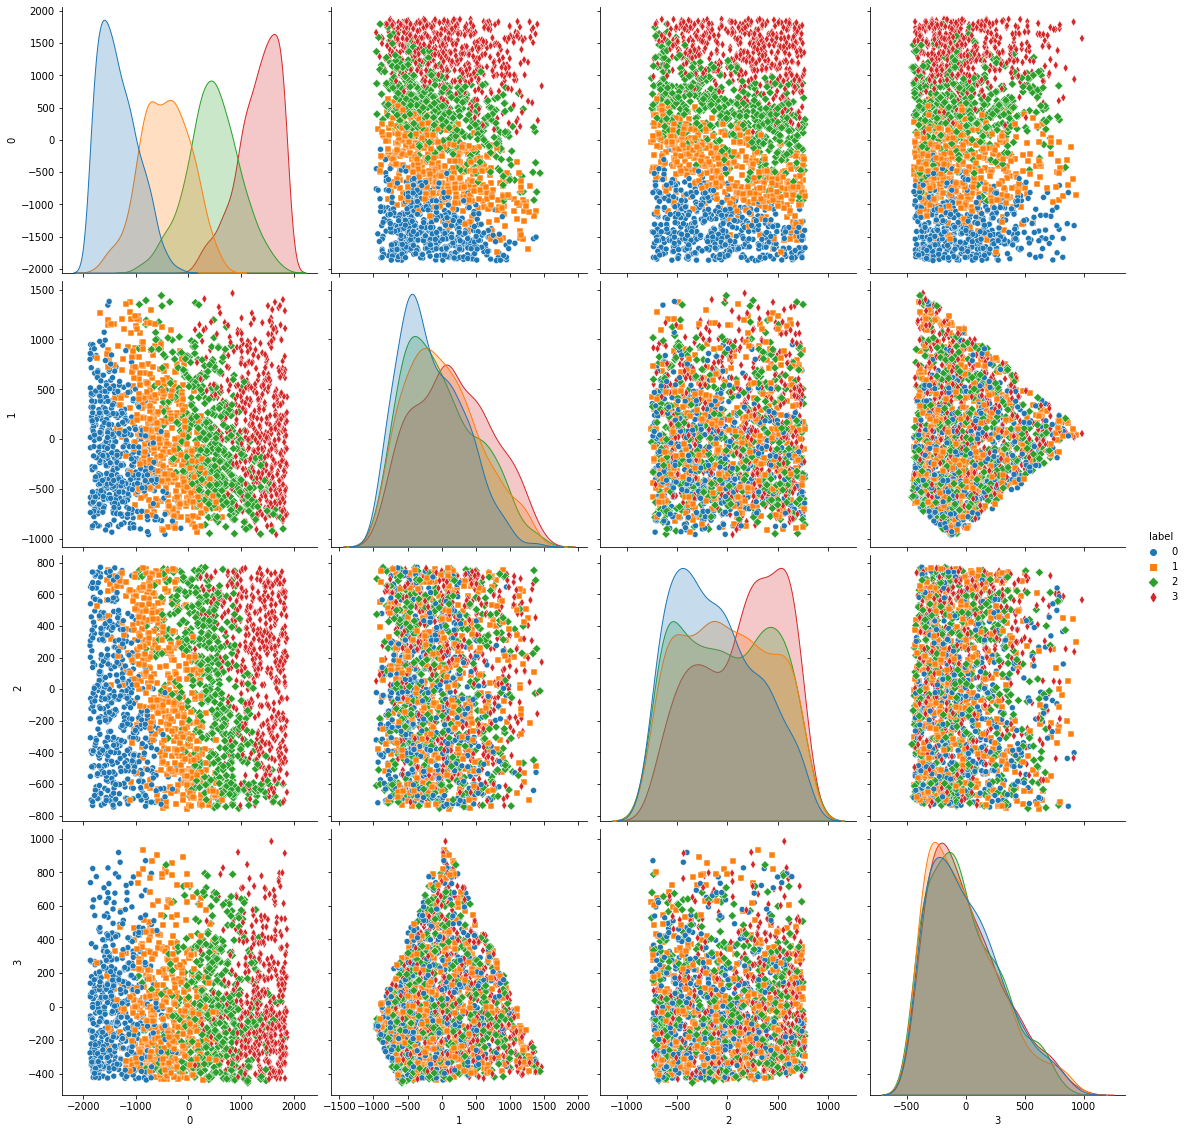

In [ ]:
dr_data = pca_train.copy()
sns.color_palette("vlag", as_cmap=True)
dr_data['label'] = train.iloc[:,-1]
sns.pairplot(dr_data, hue='label',markers=["o", "s", "D","d"],size=4)

## Scaler and fit model

In [ ]:
scaler = StandardScaler(with_mean=True, with_std=False).fit(pca_train)
dr_train = pd.DataFrame(scaler.transform(pca_train))
dr_train.head()

,0,1,2,3
0,430.597094,-795.788231,-390.070331,55.636140
1,504.984735,696.622368,-235.629081,343.925977
2,473.329828,763.942136,-680.059466,-113.916880
3,639.822324,779.691180,-630.783647,-30.402246
4,-718.985184,382.304525,591.040362,-392.357235


Text(0.5, 1.0, 'Data after using Dim Reduce and Standard Scale')

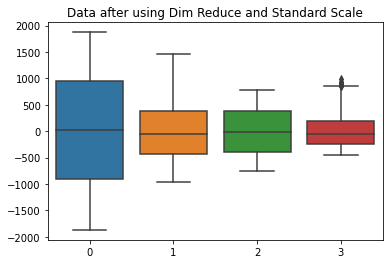

In [ ]:
sns.boxplot(data = dr_train)
plt.title("Data after using Dim Reduce and Standard Scale")

**Nhận xét:** Sau khi giảm chiều dữ liệu bằng PCA và Chuẩn hoá bằng Standard Scale Dữ liệu của chúng ta còn 4 đặc trưng và có Trung vị tại vị trí 0.

## Define and training model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dr_train, train.iloc[:,-1],
                                                    random_state=params["random_state"],
                                                    train_size=params['data_split_train'])
model = LogisticRegression(fit_intercept= True,max_iter= 100,solver= 'newton-cg')
model.fit(X_train,y_train)
print("Train done!")

Train done!


## Predict

In [ ]:
y_pred = model.predict(X_test)

Ma trận nhầm lẫn: 
[[141   2   0   0]
 [  6 153   8   0]
 [  0   1 135   9]
 [  0   0   7 138]]


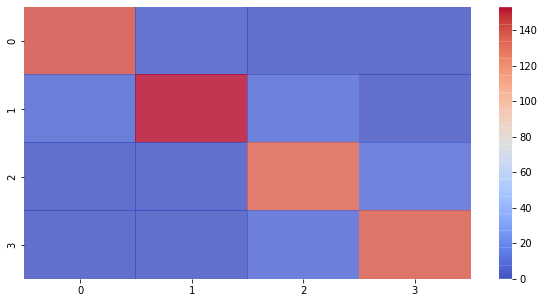

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Tính các độ đo
cmatrix = confusion_matrix(y_pred,y_test)
plt.figure(figsize=(10,5))
sns.heatmap(cmatrix,cmap='coolwarm',alpha=0.8)

print("Ma trận nhầm lẫn: ")
print(cmatrix)

In [ ]:
# Tổng quan kết quả
metric_score = classification_report(y_pred,y_test)
print(metric_score)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       143
           1       0.98      0.92      0.95       167
           2       0.90      0.93      0.92       145
           3       0.94      0.95      0.95       145

    accuracy                           0.94       600
   macro avg       0.94      0.95      0.95       600
weighted avg       0.95      0.94      0.95       600



In [ ]:
from sklearn.metrics import precision_recall_fscore_support
scores = precision_recall_fscore_support(y_test, y_pred, average='macro')
accuracy = metrics.accuracy_score(y_test, y_pred, normalize=True)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
scores = precision_recall_fscore_support(y_test, y_pred, average='macro')
accuracy = metrics.accuracy_score(y_test, y_pred, normalize=True)
# Kết quả
print("Độ chính xác (precision): {:7.2f}%".format(scores[0]*100))
print("Độ triệu hồi (recall): {:7.2f}%".format(scores[1]*100))
print("Độ đo F1 (F1-measure): {:7.2f}%".format(scores[2]*100))
print("Độ chính xác (accuracy): {:7.2f}%".format(accuracy*100))

Độ chính xác (precision):   94.62%
Độ triệu hồi (recall):   94.47%
Độ đo F1 (F1-measure):   94.51%
Độ chính xác (accuracy):   94.50%


**Nhận xét:** Sau khi chuẩn hoá và giảm chiều dữ liệu thì kết quả khá khả quan accuracy lên đến 94.50% tuy nhiên giá trị này  vẫn thấp hơn khi không sử dụng phương pháp giảm chiều và chuẩn hoá. (So sánh với thực nghiệm 1)

## Summary 🦖

---------------------------------------------
- Lab2: Dim Reduce (PCA,LDA), Thêm model (MLPClassifier, DecisionTreeClassifer)
  - Dùng GridSearch tìm mô hình và params tối ưu
  ==> Thử nghiệm: Sử dụng kết hợp giữ nguyên và giảm chiều dữ liệu và thêm 2 mô hình mới.

    ---> Với bộ dataset trên không sử dụng PCA sẽ cho kết quả tốt nhất 0.97
  
  - Khi sử dụng PCA với tham số n_component tối uưu nhất (0.95) thu được kết quả là dữ liệu mới có 4 chiều
  
    ---> Kết quả khi sử dụng PCA là 0.94
  

In [ ]:
|